# Support Vector Machine


*   Used for both regression and classification tasks
*   Not recommended for large datasets



Purpose: Classify the Loan Status

In [ ]:
#Mount the google drive connection to our dataset
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


Load the dataset

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/My Drive/AI/datasets/loan_data.csv')

In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            381 non-null    object 
 1   Gender             376 non-null    object 
 2   Married            381 non-null    object 
 3   Dependents         373 non-null    object 
 4   Education          381 non-null    object 
 5   Self_Employed      360 non-null    object 
 6   ApplicantIncome    381 non-null    int64  
 7   CoapplicantIncome  381 non-null    float64
 8   LoanAmount         381 non-null    float64
 9   Loan_Amount_Term   370 non-null    float64
 10  Credit_History     351 non-null    float64
 11  Property_Area      381 non-null    object 
 12  Loan_Status        381 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 38.8+ KB


In [ ]:
df.drop("Loan_ID", axis=1, inplace=True)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [ ]:
df.shape

(381, 12)

Check the categorical variables

In [ ]:
print(df["Gender"].value_counts())
print(df["Education"].value_counts())
print(df["Self_Employed"].value_counts())
print(df["Property_Area"].value_counts())
print(df["Loan_Status"].value_counts())

Male      291
Female     85
Name: Gender, dtype: int64
Graduate        278
Not Graduate    103
Name: Education, dtype: int64
No     325
Yes     35
Name: Self_Employed, dtype: int64
Semiurban    149
Urban        126
Rural        106
Name: Property_Area, dtype: int64
Y    271
N    110
Name: Loan_Status, dtype: int64


Fill Null and NA data

In [ ]:
df.isnull().sum()

Gender                5
Married               0
Dependents            8
Education             0
Self_Employed        21
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
print(df["Dependents"].value_counts())

0     234
2      59
1      52
3+     28
Name: Dependents, dtype: int64


In [ ]:
print(df["Credit_History"].value_counts())

1.0    294
0.0     57
Name: Credit_History, dtype: int64


In [ ]:
df['Gender'].fillna('Female', inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Self_Employed'].fillna('Yes', inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Visualize the data

Categorical variables

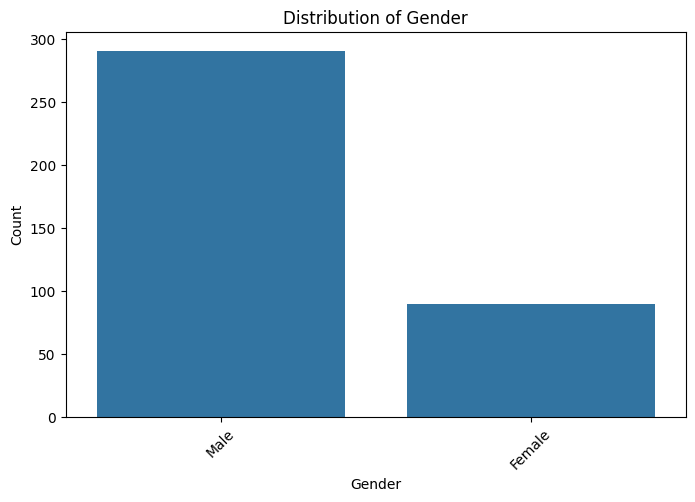

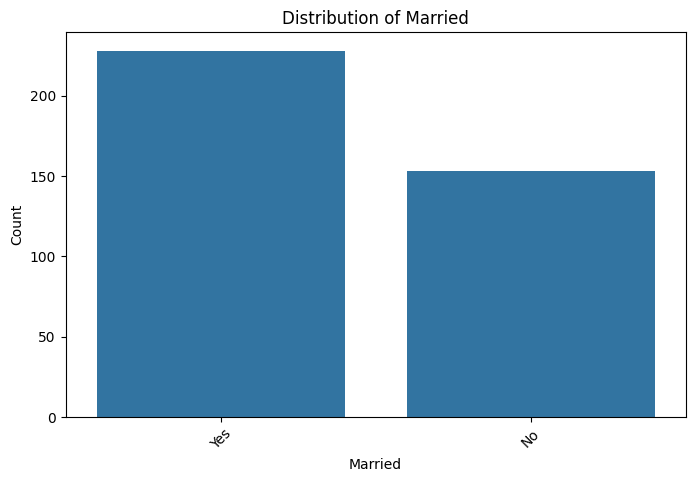

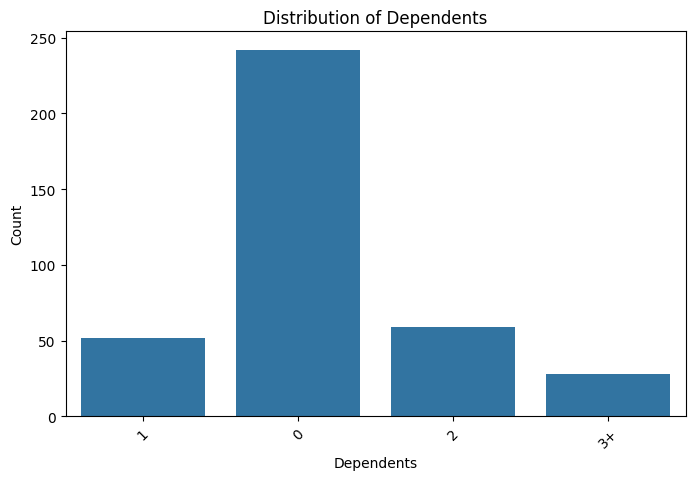

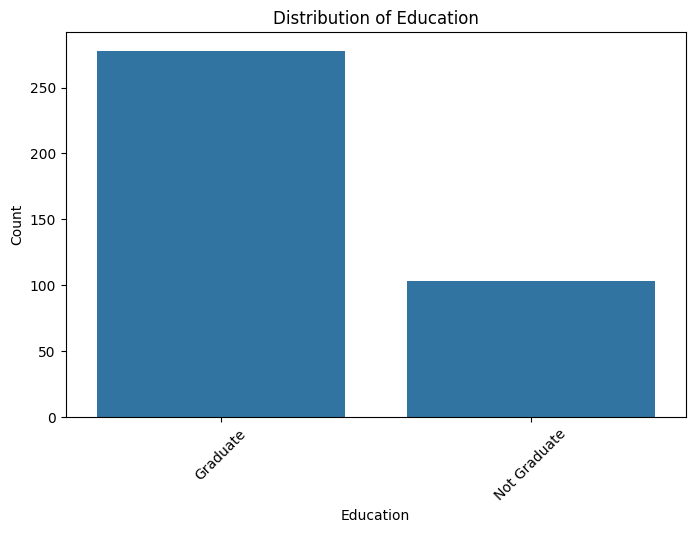

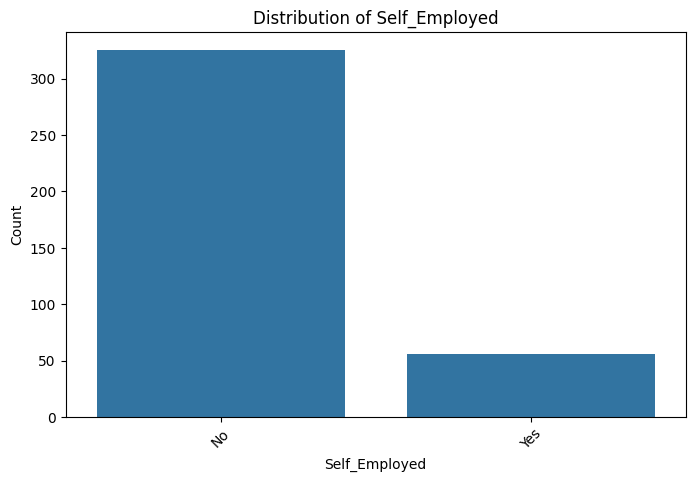

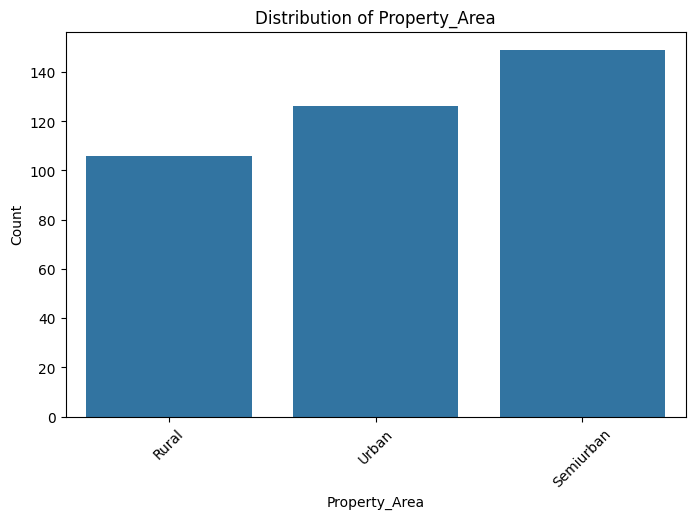

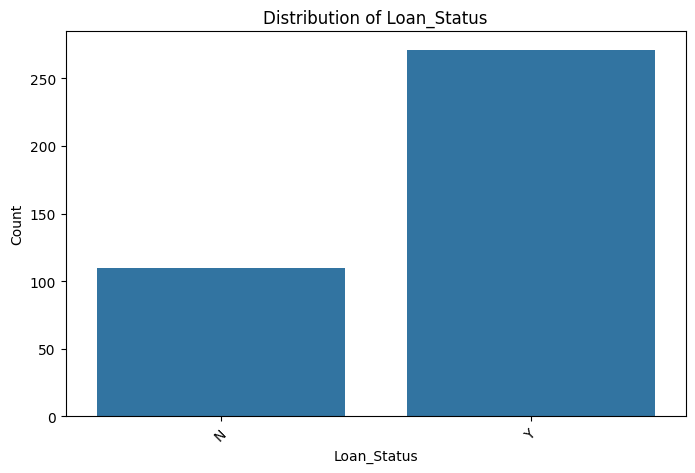

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

categorical_vars = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
for var in categorical_vars:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x=var)
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

 Numeric variables

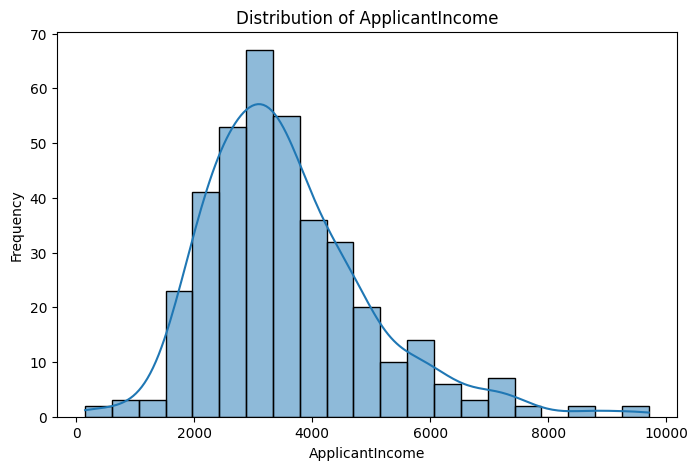

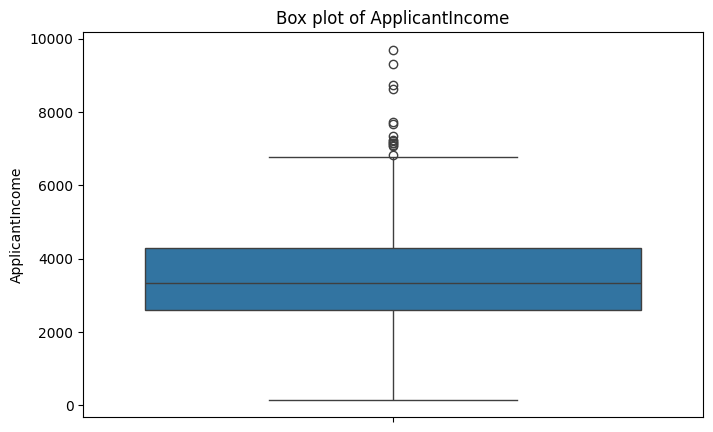

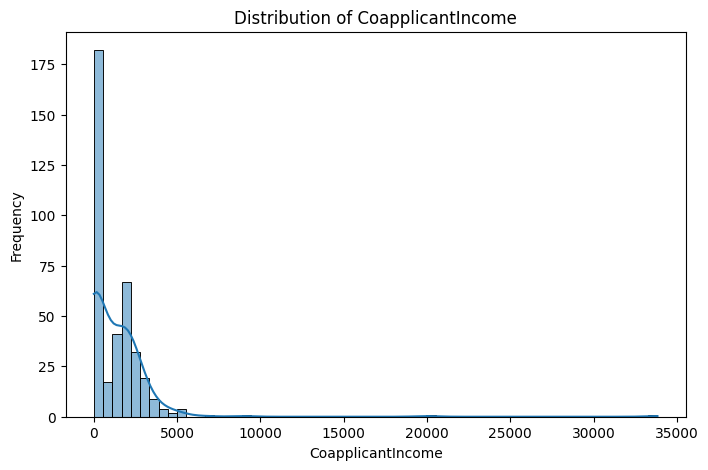

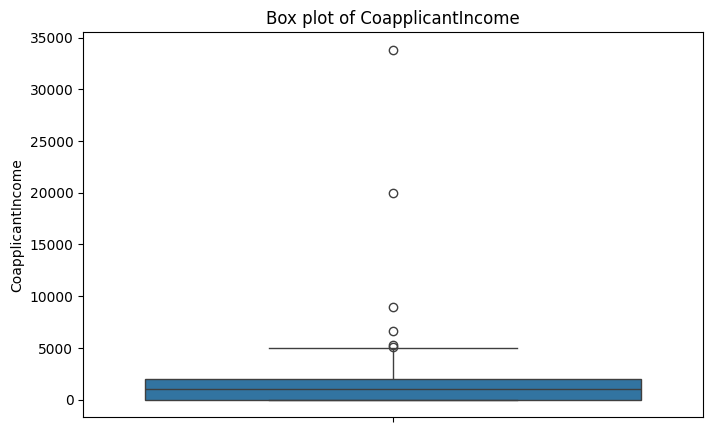

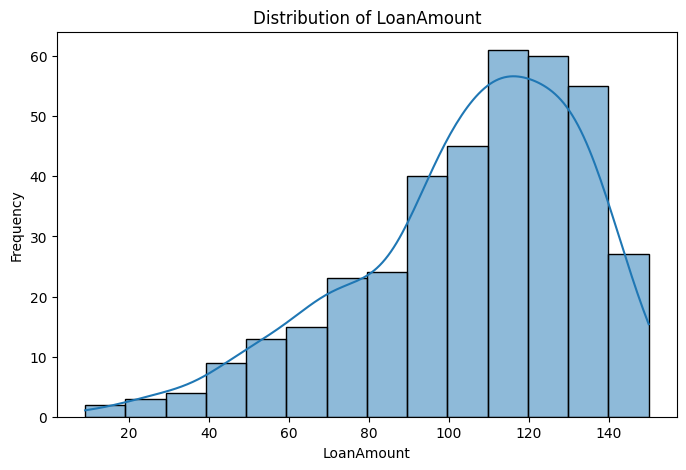

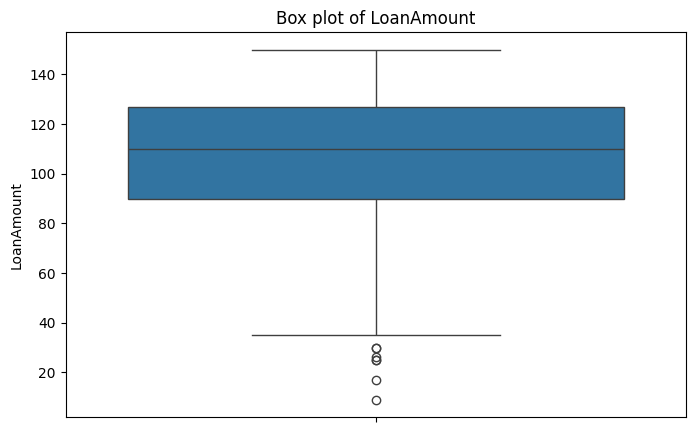

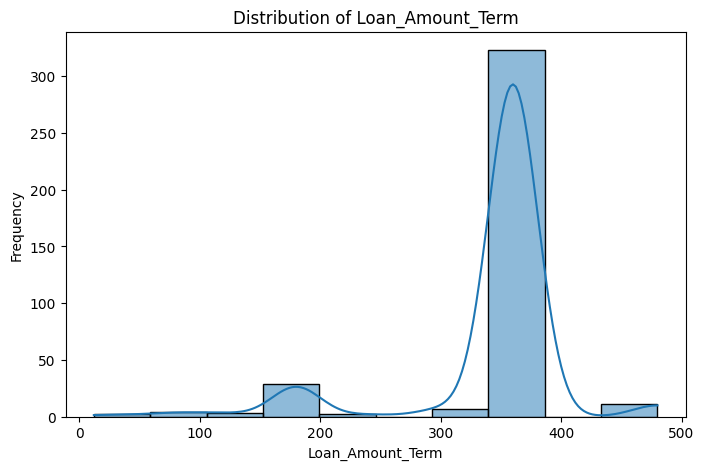

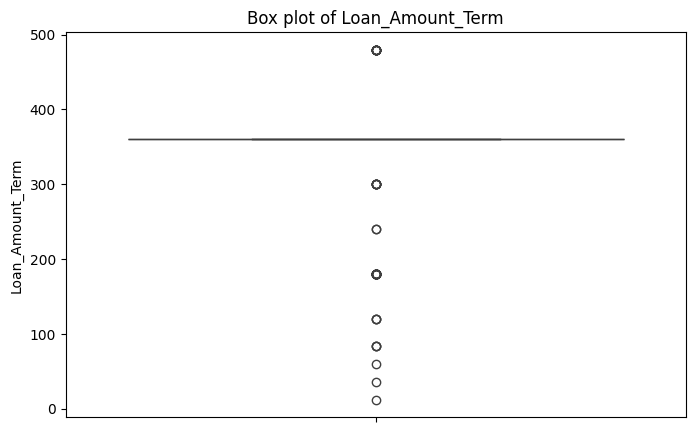

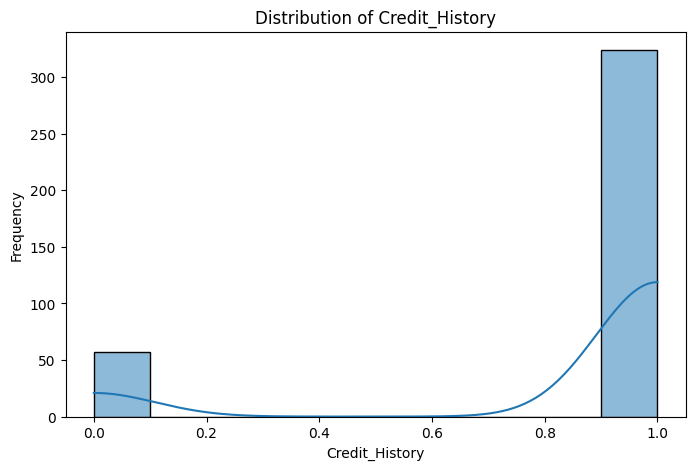

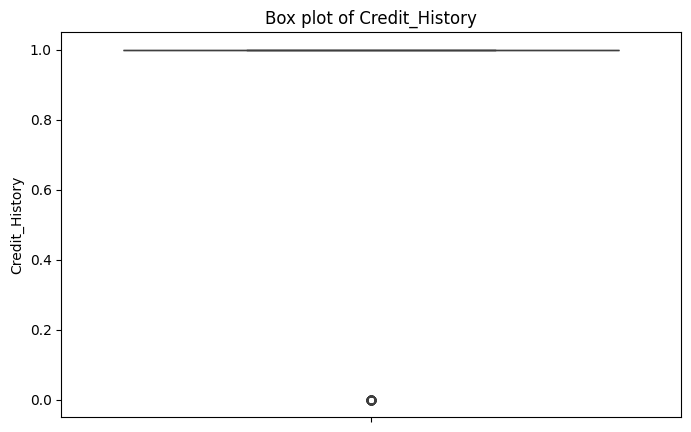

In [ ]:
numeric_vars = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']

for var in numeric_vars:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[var], kde=True)
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.show()

    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df, y=var)
    plt.title(f'Box plot of {var}')
    plt.ylabel(var)
    plt.show()

Encode categorical variables

In [ ]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

In [ ]:
onehot_cols = ['Gender', 'Education', 'Self_Employed', 'Married']
ordinal_cols = ['Property_Area', 'Loan_Status']

In [ ]:
onehot_pipeline = Pipeline([
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

ordinal_pipeline = Pipeline([
    ('ordinal', OrdinalEncoder())
])

preprocessor = ColumnTransformer(transformers=[
    ('onehot', onehot_pipeline, onehot_cols),
    ('ordinal', ordinal_pipeline, ordinal_cols)
], remainder='passthrough')


In [ ]:
processed_data = preprocessor.fit_transform(df)

In [ ]:
encoded_onehot_cols = preprocessor.named_transformers_['onehot'].named_steps['onehot'] \
                      .get_feature_names_out(input_features=onehot_cols)

encoded_cols = list(encoded_onehot_cols) + ordinal_cols + list(df.columns.drop(onehot_cols + ordinal_cols))

processed_df = pd.DataFrame(processed_data, columns=encoded_cols)
print(processed_df)

    Gender_Female Gender_Male Education_Graduate Education_Not Graduate  \
0             0.0         1.0                1.0                    0.0   
1             0.0         1.0                1.0                    0.0   
2             0.0         1.0                0.0                    1.0   
3             0.0         1.0                1.0                    0.0   
4             0.0         1.0                0.0                    1.0   
..            ...         ...                ...                    ...   
376           0.0         1.0                1.0                    0.0   
377           0.0         1.0                1.0                    0.0   
378           1.0         0.0                1.0                    0.0   
379           0.0         1.0                1.0                    0.0   
380           1.0         0.0                1.0                    0.0   

    Self_Employed_No Self_Employed_Yes Married_No Married_Yes Property_Area  \
0                1.0

In [ ]:
processed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender_Female           381 non-null    object
 1   Gender_Male             381 non-null    object
 2   Education_Graduate      381 non-null    object
 3   Education_Not Graduate  381 non-null    object
 4   Self_Employed_No        381 non-null    object
 5   Self_Employed_Yes       381 non-null    object
 6   Married_No              381 non-null    object
 7   Married_Yes             381 non-null    object
 8   Property_Area           381 non-null    object
 9   Loan_Status             381 non-null    object
 10  Dependents              381 non-null    object
 11  ApplicantIncome         381 non-null    object
 12  CoapplicantIncome       381 non-null    object
 13  LoanAmount              381 non-null    object
 14  Loan_Amount_Term        381 non-null    object
 15  Credit

In [ ]:
processed_df['Dependents'] = processed_df['Dependents'].str.replace('+', '')
processed_df = processed_df.astype(float)
processed_df['Dependents'] = processed_df['Dependents'].astype(int)

<ipython-input-22-716e9d012bf1>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  processed_df['Dependents'] = processed_df['Dependents'].str.replace('+', '')


In [ ]:
processed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Gender_Female           381 non-null    float64
 1   Gender_Male             381 non-null    float64
 2   Education_Graduate      381 non-null    float64
 3   Education_Not Graduate  381 non-null    float64
 4   Self_Employed_No        381 non-null    float64
 5   Self_Employed_Yes       381 non-null    float64
 6   Married_No              381 non-null    float64
 7   Married_Yes             381 non-null    float64
 8   Property_Area           381 non-null    float64
 9   Loan_Status             381 non-null    float64
 10  Dependents              381 non-null    int64  
 11  ApplicantIncome         381 non-null    float64
 12  CoapplicantIncome       381 non-null    float64
 13  LoanAmount              381 non-null    float64
 14  Loan_Amount_Term        381 non-null    fl

In [ ]:
processed_df.head()

,Gender_Female,Gender_Male,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Married_No,Married_Yes,Property_Area,Loan_Status,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1,4583.0,1508.0,128.0,360.0,1.0
1,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,2.0,1.0,0,3000.0,0.0,66.0,360.0,1.0
2,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,2.0,1.0,0,2583.0,2358.0,120.0,360.0,1.0
3,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,2.0,1.0,0,6000.0,0.0,141.0,360.0,1.0
4,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,2.0,1.0,0,2333.0,1516.0,95.0,360.0,1.0


In [ ]:
unique_property_area = df["Property_Area"].unique()

comparison_df = pd.DataFrame({"Old_Property_Area": unique_property_area,
                              "Encoded_Property_Area": processed_df["Property_Area"].unique()})

comparison_df = comparison_df.sort_values(by="Old_Property_Area").reset_index(drop=True)

print(comparison_df)

  Old_Property_Area  Encoded_Property_Area
0             Rural                    0.0
1         Semiurban                    1.0
2             Urban                    2.0


In [ ]:
unique_loan_status = df["Loan_Status"].unique()

comparison_df = pd.DataFrame({"Old_Loan_Status": unique_loan_status,
                              "Encoded_Loan_Status": processed_df["Loan_Status"].unique()})

comparison_df = comparison_df.sort_values(by="Old_Loan_Status").reset_index(drop=True)

print(comparison_df)

  Old_Loan_Status  Encoded_Loan_Status
0               N                  0.0
1               Y                  1.0


Use the classification model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, make_scorer

In [ ]:
X = processed_df.drop(columns=['Loan_Status'])
y = processed_df['Loan_Status']

In [ ]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [ ]:
svm_model = SVC(kernel='linear')

In [ ]:
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

Loss Function => Accuracy

In [ ]:
val_accuracy = accuracy_score(y_val, svm_model.predict(X_val))
print("Validation Accuracy:", val_accuracy)

test_accuracy = accuracy_score(y_test, svm_model.predict(X_test))
print("Test Accuracy:", test_accuracy)

Validation Accuracy: 0.8026315789473685
Test Accuracy: 0.8181818181818182


Prediction

In [ ]:
df_for_test = {
    'Gender_Female': 1.0,
    'Gender_Male': 0.0,
    'Education_Graduate': 1.0,
    'Education_Not Graduate': 0.0,
    'Self_Employed_No': 1.0,
    'Self_Employed_Yes': 0.0,
    'Married_No': 1.0,
    'Married_Yes': 0.0,
    'Property_Area': 2.0,
    'Dependents': 2,
    'ApplicantIncome': 5827.3,
    'CoapplicantIncome': 0.0,
    'LoanAmount': 130.5,
    'Loan_Amount_Term': 352.4,
    'Credit_History': 1.0
}

df_for_test = pd.DataFrame([df_for_test])
predict = svm_model.predict(df_for_test)
print(f"Loan Status prediction: {predict}")

Loan Status prediction: [1.]
